In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# generate the dataset
from sklearn.datasets import make_blobs

# PCA
from sklearn.decomposition import PCA

from ensemble_autoencoder import EnsembleRandomAutoencoder

In [2]:
def generate_random_dataset():
    # generate
    X1, y1 = make_blobs(n_samples=10000, centers=1, center_box=(10, 15), n_features=15)
    X2, y2 = make_blobs(n_samples=100, centers=1, center_box=(-4, -3), n_features=15)
    
    # stack the data and shuffle
    X = np.vstack((X1, X2))
    np.random.shuffle(X)
    
    # stack the data and shuffle
    X = np.vstack((X1, X2))
    np.random.shuffle(X)
    return X

def plot_data(data):
    # plot
    plt.scatter(data[:, 0], data[:, 1])
    plt.xlabel('feature1')
    plt.ylabel('feature2')
    plt.title('Some random dataset')
    plt.show()
    
def plot_data_outliers(data, preds, title):
    df = pd.DataFrame(np.hstack((data, preds.reshape(preds.shape[0], 1))), columns=['feature1', 'feature2', 'label'])
    groups = df.groupby("label")
    plt.title(title)
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    colors = ['blue', 'red']
    for idx, (lab, group) in enumerate(groups):
        plt.plot(group['feature1'], group['feature2'], marker='o', linestyle="", label=lab, color=colors[idx])
    plt.legend()
    plt.show()

In [3]:
data = generate_random_dataset()

In [4]:
data.shape

(10100, 15)

In [7]:
# Scale the data
data = (data - data.mean(axis=0)) / data.std(axis=0)

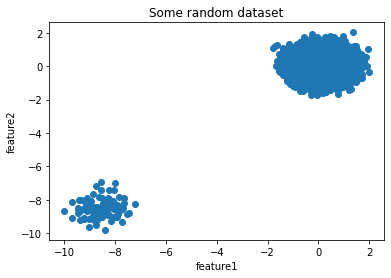

In [8]:
# plot first 2 dimensions of the data
plot_data(data)

In [9]:
pca_model = PCA(n_components=2)
reduced_data = pca_model.fit_transform(data)

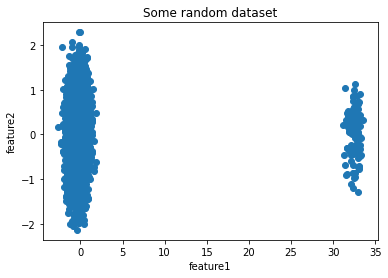

In [10]:
plot_data(reduced_data)

In [11]:
batchs_size = [32, 64, 128, 256]
model_ensemble_ae = EnsembleRandomAutoencoder(batchs_size, 3, data, input_size=15, nb_epochs=100)

In [12]:
model_ensemble_ae.display_loaders_info()

Data Loader nb: 1
Nb batch:       130
Batch size:     64
Nb samples:     8320
-------------
Data Loader nb: 2
Nb batch:       36
Batch size:     256
Nb samples:     9216
-------------
Data Loader nb: 3
Nb batch:       144
Batch size:     64
Nb samples:     9216
-------------


In [13]:
model_ensemble_ae.print_models()

Model nb 1
Input size: 15
Latent size: 3
Alpha coef: 0.55
Layers_size: [15, 8, 4, 3]
-------------
Model nb 2
Input size: 15
Latent size: 7
Alpha coef: 0.33
Layers_size: [15, 7]
-------------
Model nb 3
Input size: 15
Latent size: 5
Alpha coef: 0.66
Layers_size: [15, 9, 5]
-------------


In [14]:
model_ensemble_ae.models_summary()

Model nb 1
Autoencoder(
  (layers): ModuleList(
    (0): Linear(in_features=15, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=4, bias=True)
    (2): Linear(in_features=4, out_features=3, bias=True)
    (3): Linear(in_features=3, out_features=4, bias=True)
    (4): Linear(in_features=4, out_features=8, bias=True)
    (5): Linear(in_features=8, out_features=15, bias=True)
  )
)
-------------
Model nb 2
Autoencoder(
  (layers): ModuleList(
    (0): Linear(in_features=15, out_features=7, bias=True)
    (1): Linear(in_features=7, out_features=15, bias=True)
  )
)
-------------
Model nb 3
Autoencoder(
  (layers): ModuleList(
    (0): Linear(in_features=15, out_features=9, bias=True)
    (1): Linear(in_features=9, out_features=5, bias=True)
    (2): Linear(in_features=5, out_features=9, bias=True)
    (3): Linear(in_features=9, out_features=15, bias=True)
  )
)
-------------


In [15]:
model_ensemble_ae.fit()

TRAINING ae nb. 1
Epoch nb 1
[=======================]
epoch : 1/100, loss = 1.871692
Epoch nb 2
[=======================]
epoch : 2/100, loss = 1.813031
Epoch nb 3
[=======================]
epoch : 3/100, loss = 1.813623
Epoch nb 4
[=======================]
epoch : 4/100, loss = 1.810296
Epoch nb 5
[=======================]
epoch : 5/100, loss = 1.779609
Epoch nb 6
[=======================]
epoch : 6/100, loss = 1.804681
Epoch nb 7
[=======================]
epoch : 7/100, loss = 1.781864
Epoch nb 8
[=======================]
epoch : 8/100, loss = 1.779887
Epoch nb 9
[=======================]
epoch : 9/100, loss = 1.739215
Epoch nb 10
[=======================]
epoch : 10/100, loss = 1.731235
Epoch nb 11
[=======================]
epoch : 11/100, loss = 1.719481
Epoch nb 12
[=======================]
epoch : 12/100, loss = 1.739861
Epoch nb 13
[=======================]
epoch : 13/100, loss = 1.728692
Epoch nb 14
[=======================]
epoch : 14/100, loss = 1.723666
Epoch nb 15
[=======

[=====================================]
epoch : 16/100, loss = 1.847461
Epoch nb 17
[=====================================]
epoch : 17/100, loss = 1.929317
Epoch nb 18
[=====================================]
epoch : 18/100, loss = 1.832455
Epoch nb 19
[=====================================]
epoch : 19/100, loss = 1.816435
Epoch nb 20
[=====================================]
epoch : 20/100, loss = 1.911070
Epoch nb 21
[=====================================]
epoch : 21/100, loss = 1.808464
Epoch nb 22
[=====================================]
epoch : 22/100, loss = 1.800619
Epoch nb 23
[=====================================]
epoch : 23/100, loss = 1.891912
Epoch nb 24
[=====================================]
epoch : 24/100, loss = 1.788474
Epoch nb 25
[=====================================]
epoch : 25/100, loss = 1.790625
Epoch nb 26
[=====================================]
epoch : 26/100, loss = 1.776290
Epoch nb 27
[=====================================]
epoch : 27/100, loss = 1.857209
Epoc

[======================]
epoch : 17/100, loss = 1.750318
Epoch nb 18
[======================]
epoch : 18/100, loss = 1.741563
Epoch nb 19
[======================]
epoch : 19/100, loss = 1.737094
Epoch nb 20
[======================]
epoch : 20/100, loss = 1.727812
Epoch nb 21
[======================]
epoch : 21/100, loss = 1.723972
Epoch nb 22
[======================]
epoch : 22/100, loss = 1.701021
Epoch nb 23
[======================]
epoch : 23/100, loss = 1.697529
Epoch nb 24
[======================]
epoch : 24/100, loss = 1.710240
Epoch nb 25
[======================]
epoch : 25/100, loss = 1.703986
Epoch nb 26
[======================]
epoch : 26/100, loss = 1.650385
Epoch nb 27
[======================]
epoch : 27/100, loss = 1.655996
Epoch nb 28
[======================]
epoch : 28/100, loss = 1.685110
Epoch nb 29
[======================]
epoch : 29/100, loss = 1.694151
Epoch nb 30
[======================]
epoch : 30/100, loss = 1.676393
Epoch nb 31
[======================]
epoch : 3

In [16]:
model_ensemble_ae_preds = model_ensemble_ae.outliers_scoring(data)

In [17]:
model_ensemble_ae_preds.shape

torch.Size([10100])

In [18]:
print(model_ensemble_ae_preds[:10])

tensor([13.0531,  3.8046,  3.4569,  7.8206,  7.4033, 11.5996,  6.4356,  6.3332,
         6.2251, 10.7334], grad_fn=<SliceBackward>)


In [20]:
n = 100
outliers_pos = model_ensemble_ae_preds.argsort()[-n:]

preds_ae_model = np.ones(len(model_ensemble_ae_preds))
preds_ae_model[outliers_pos] = -1

In [21]:
preds_ae_model

array([1., 1., 1., ..., 1., 1., 1.])

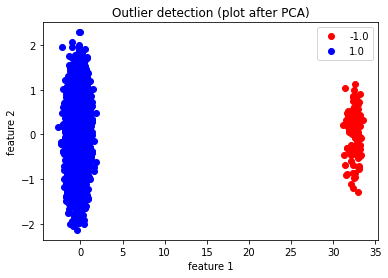

In [26]:
df = pd.DataFrame(np.hstack((reduced_data, preds_ae_model.reshape(preds_ae_model.shape[0], 1))), columns=['feature1', 'feature2', 'label'])
groups = df.groupby("label")
plt.title('')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
colors = ['red', 'blue']
for idx, (lab, group) in enumerate(groups):
    plt.plot(group['feature1'], group['feature2'], marker='o', linestyle="", label=lab, color=colors[idx])
plt.legend()
plt.title('Outlier detection (plot after PCA)')
plt.savefig('outlier_detection_example.png')
plt.show()